In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

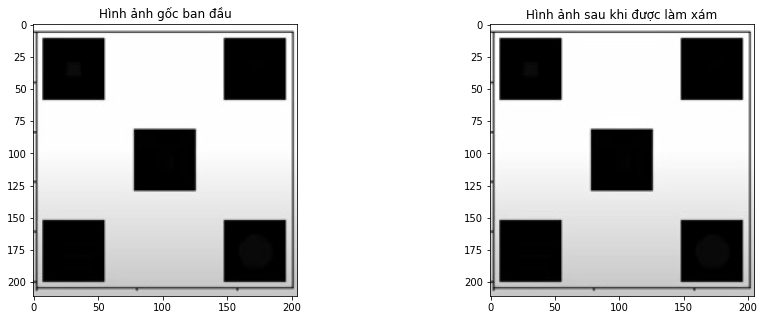

In [ ]:
img0= cv2.imread('/content/drive/MyDrive/XuLyAnh/PhatHienVatTheLa.jpg')
img = cv2.imread('/content/drive/MyDrive/XuLyAnh/PhatHienVatTheLa.jpg',0)
plt.figure(figsize=(15,5))
plt.subplot(121) , plt.imshow(img0), plt.title("Hình ảnh gốc ban đầu")
plt.subplot(122) , plt.imshow(img,cmap="gray"), plt.title("Hình ảnh sau khi được làm xám")
plt.show()

In [ ]:
img1 = copy.deepcopy(img)

**KY THUAT PREWITT VA SOBEL**

vì 2 cái này giống nhau mình chỉ làm 1 cái thôi

In [ ]:
def TimNguong(image):
  vector=[]
  for i in np.arange(0,image.shape[1]):
    ok= np.max(image[:,i])
    vector.append(ok)
  return np.min(vector)

In [ ]:
def TichChap(img,kernel): 
  m,n= img.shape

  zero = np.zeros((m+2,n+2))
  out= np.zeros((m+2,n+2))
  zero[1:(m+1),1:(n+1)]= img
  for i in np.arange(1,m+1):
    for j in np.arange(1,n+1):
      out[i,j]= np.sum(zero[i-1:i+2,j-1:j+2]* kernel)

  return out[1:m+1,1:n+1]

Sobel với ngưỡng tự set

In [ ]:
def sobel(image,Hx,Hy,Thre): #cai nay chi phu hop cho kernel 3*3 
  I1 = copy.deepcopy(image)
  I2 = copy.deepcopy(image)
  
  I1 = TichChap(I1,Hx)
  I2 = TichChap(I2,Hy)

  I3 = np.absolute(I1)+ np.absolute(I2)

  I4 = copy.deepcopy(I3)  
  
  I3[I4<Thre]=0
  I3[I4>=Thre]=1

  return I3

Sobel tìm ngưỡng tự động

In [ ]:
def sobel1(image,Hx,Hy):
  Thre = TimNguong(image)

  I1 = copy.deepcopy(image)
  I2 = copy.deepcopy(image)
  
  I1 = TichChap(I1,Hx)
  I2 = TichChap(I2,Hy)

  I3 = np.absolute(I1)+ np.absolute(I2)

  I4 = copy.deepcopy(I3)  
  
  I3[I4<Thre]=0
  I3[I4>=Thre]=1

  return I3

In [ ]:
Hx= np.array([
              [-1,0,1],
              [-2,0,2],
              [-1,0,1],
])
Hy= np.array([
              [-1,-2,-1],
              [0,0,0],
              [1,2,1]
])

I= np.array([
             [0,0,0,0],
             [0,3,3,3],
             [0,3,3,3],
             [0,3,3,3],
])

In [ ]:
TichChap(I,Hx)

array([[  3.,   3.,   0.,  -3.],
       [  9.,   9.,   0.,  -9.],
       [ 12.,  12.,   0., -12.],
       [  9.,   9.,   0.,  -9.]])

In [ ]:
TichChap(I,Hy)

array([[  3.,   9.,  12.,   9.],
       [  3.,   9.,  12.,   9.],
       [  0.,   0.,   0.,   0.],
       [ -3.,  -9., -12.,  -9.]])

In [ ]:
np.absolute(TichChap(I,Hx))+np.absolute(TichChap(I,Hy))

array([[ 6., 12., 12., 12.],
       [12., 18., 12., 18.],
       [12., 12.,  0., 12.],
       [12., 18., 12., 18.]])

In [ ]:
sobel(I,Hx,Hy,1)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 1.]])

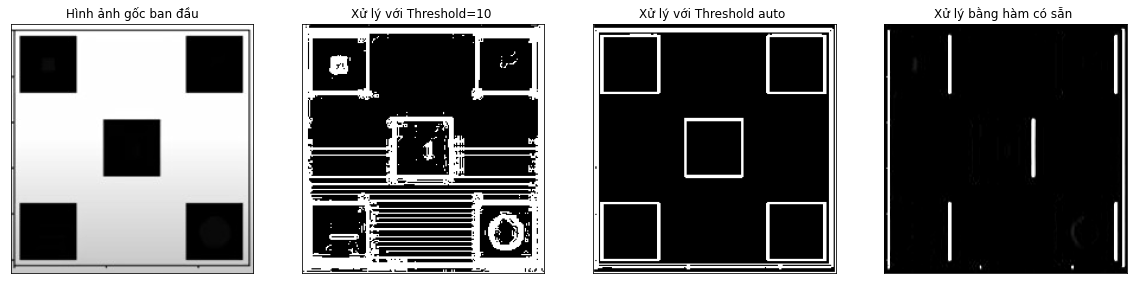

In [ ]:
img21 = copy.copy(img1)
img22 = copy.copy(img1)
img23 = copy.copy(img1)
img21= sobel(img21,Hx,Hy,5)
img22 = sobel1(img22,Hx,Hy)
img23 = cv2.Sobel(img23,cv2.CV_8U,1,0,ksize=3) #cac tham so lan luot la: anh goc du lieu, kieu du lieu, 1 va 0 la dieu kien Sobelx va Sobely dc dung, cuoi cung la kich thuoc kernel 


plt.figure(figsize=(20,6))
plt.subplot(141) , plt.imshow(img1,cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(142) , plt.imshow(img21,cmap="gray"), plt.title("Xử lý với Threshold=10 ")
plt.xticks([]), plt.yticks([])
plt.subplot(143) , plt.imshow(img22,cmap="gray"), plt.title("Xử lý với Threshold auto ")
plt.xticks([]), plt.yticks([])
plt.subplot(144) , plt.imshow(img23,cmap="gray"), plt.title("Xử lý bằng hàm có sẵn ")
plt.xticks([]), plt.yticks([])

plt.show()

**Kỹ thuật Laplace**

In [ ]:
def Laplace(image,H):
  m,n= image.shape
  #b1 tinh tich chap
  I1 = TichChap(image,H)
  #b2 phan cuc
  I2 = copy.deepcopy(I1)
  I1[I2<=0]=1
  I1[I2>0]=0
  #b3 tim bien
  I3= copy.deepcopy(I1)
  for i in np.arange(0,m):
    for j in np.arange(0,n):
      if i==0 or i== m-1:
        if j==0 or j == n-1:
            I1[i,j]=0
        else:
          if I3[i,j-1]!=I3[i,j+1]:
            I1[i,j]=1
          else:
            I1[i,j]=0

      elif j==0 or j== n-1:
        if I3[i-1,j]!= I3[i+1,j]:
          I1[i,j]=1
        else:
          I1[i,j]=0

      else:
        if (I3[i-1,j]!=I3[i+1,j]) or (I3[i,j-1]!=I3[i,j+1]):
          I1[i,j]=1
        else:
          I1[i,j]=0
  
  return I1

In [ ]:
I2 = np.array(
    [
      [3,3,8,9,9,2,3],
      [3,2,9,9,9,3,3],
      [3,2,8,8,8,2,2],
      [2,2,9,9,8,3,2],
      [3,2,8,9,6,2,3]
    ]

)

H1= np.array(
    [
     [0,-1,0],
     [-1,4,-1],
     [0,-1,0]
    ]
)

In [ ]:
Laplace(I2,H1)

array([[0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0.]])

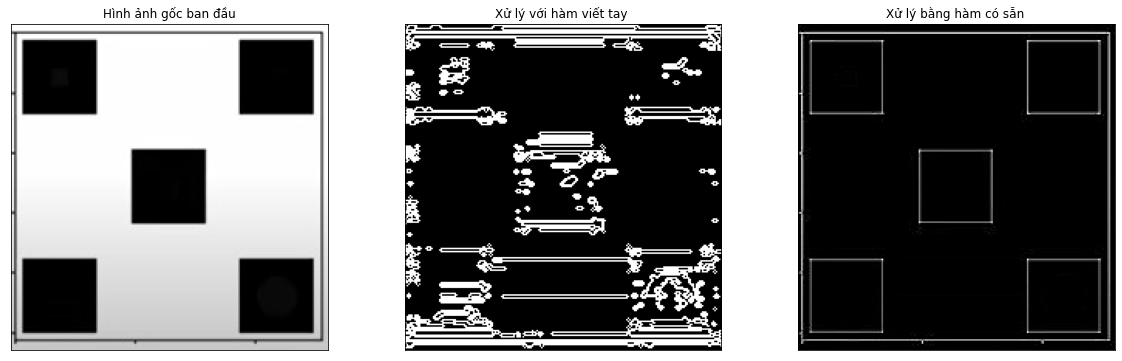

In [ ]:
img31 = copy.copy(img1)
img32 = copy.copy(img1)
img31= Laplace(img31,Hy)
img32= cv2.Laplacian(img32,cv2.CV_8U)


plt.figure(figsize=(20,6))
plt.subplot(131) , plt.imshow(img1,cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(img31,cmap="gray"), plt.title("Xử lý với hàm viết tay ")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(img32,cmap="gray"), plt.title("Xử lý bằng hàm có sẵn ")
plt.xticks([]), plt.yticks([])

plt.show()

#nhận xét:
#tại sao hàm viết tay khác hàm có sắn bởi vì nguyên nhân do kernel của mình là tự xét

**Kỹ thuật xoay la bàn**

In [ ]:
def rotate_kernel(H):
  result=[H]
  vector = H.ravel()
  for i in np.arange(0,7):
    vector1= copy.deepcopy(vector)
    for j in np.arange(0,9):
      if j!=4:
        if j==8:
          vector[j]=vector1[0]
        elif j== 3:
          vector[j]= vector1[5]
        else:
          vector[j]=vector1[j+1]
    ok = np.reshape(vector,(3,3))
    result.append(ok)
  return result

In [ ]:
def XoayLaBan(image,H):
  m,n= image.shape
  sum = np.zeros((m,n))
  for Hi in rotate_kernel(H):
    image1= copy.deepcopy(image)
    sum+=np.absolute(TichChap(image1,Hi))
  thre = TimNguong(image)
  sum1 = copy.deepcopy(sum)

  sum[sum1>thre]=1
  sum[sum1<=thre]=0

  return sum

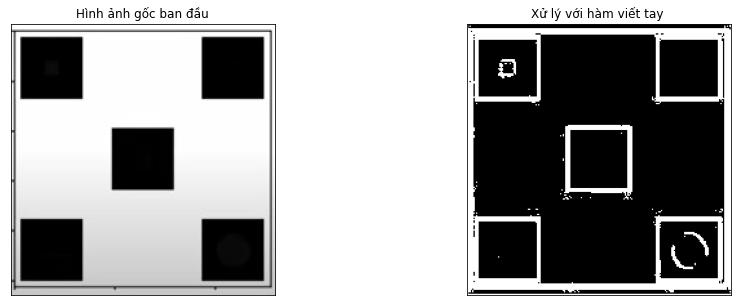

In [ ]:
H3 = np.array(
    [
     [5,5,-3],
     [5,0,-3],
     [-3,-3,-3]
    ]
)

img41 = copy.copy(img1)
img41= XoayLaBan(img41,H3)

plt.figure(figsize=(15,5))
plt.subplot(121) , plt.imshow(img1,cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(img41,cmap="gray"), plt.title("Xử lý với hàm viết tay ")
plt.xticks([]), plt.yticks([])
plt.show()